# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Identifying key factors influencing participation and rates and scores in various states using aggregate SAT and ACT

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat17 = pd.read_csv('../data/sat_2017.csv')
act17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat17.head(10)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [5]:
sat17['Participation'].describe()

count     51
unique    34
top       3%
freq       8
Name: Participation, dtype: object

In [6]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [7]:
act17['Participation'].describe()


count       52
unique      28
top       100%
freq        17
Name: Participation, dtype: object

In [8]:
act17[((act17['English'] + act17['Math'] + act17['Reading'] + act17['Science']))/4 == act17['Composite']]
#ACT Composite is defined as the average of all subscores, but doesn't seem to be

,State,Participation,English,Math,Reading,Science,Composite


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

<font color = 'green'> The SAT 2017 file lists all fifty states plus DC, followed by their respective participation rates and scores broken up between Reading/Writing and Math, plus the Total score afterward.
All states are accounted for, with no missing values.  The percentages are in type string.  There is a suspicious range in participation rate, but given that that's what I'm looking into I can't assume that's in error.

The ACT 2017 also has all fifty states plus the DC, and also includes a summary of the nation as a whole. It has columns for English, Math, Reading, and Science, with a final Composite score that is defined by the ACT as being an average of the other four but does not evaluate as such in the data.

Participation rate seems much higher for the ACT than the SAT.  The most common rate was 17 occurences of 100% participation for the ACT, as opposed to the upside-down participation rates for the SAT (8 occurences of 3% participation). </font>


#### 4a. Does the data look complete? 

Answer: 

<font color = 'green'> The SAT file has no missing entries, but a presumably false entry for Maryland's math score.  I make this assumption because it does not add with the reading and writing score of 536 to make the credited total of 1060.  As the extreme outlier, the math score is likely the problem.  All other states' Total score is the sum of their math and reading/writing.

The ACT file has a bad entry for Wyoming's Composite score: 20.2x, and another clipped value for Maryland's Science score. </font>

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 

<font color = 'green'> SAT is scored 200-800 for both sub-sections, leaving an overall range of 400-1600. Maryland math score should be 524, per source.
  
ACT is scored 1-36. Link refers to 2019 data, so I found a more contemporary pdf of 2017 data here (https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf).  The small discrepancies I noticed in the composite score vs the average of the four subsections is true to the source material; likely a rounding error. Wyoming Composite score and Maryland Science score are in error. </font>

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
sat17.loc[20, 'Math'] = 524 #Fix Maryland

In [10]:
#code
act17.loc[51, 'Composite'] = 20.2 #Fix Wyoming 


In [11]:
act17.loc[51, ['State', 'Composite']]

State        Wyoming
Composite       20.2
Name: 51, dtype: object

In [12]:
act17.loc[21, 'Science'] = 23.2 #Fix Maryland

In [13]:
act17.loc[21, ['State', 'Science']]

State      Maryland
Science        23.2
Name: 21, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [14]:
#code
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [15]:
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: <font color = 'green'> The participation rate for both is evaluated as a string.  The composite score from the ACT data set is also returning as a string. </font>

In [16]:
act17.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [17]:
#code
# def format_badstrings(series):
#     if type(series) == str:
#         return float(series)
#     else:
#         return series
def format_badstrings(s):
    if type(s) == str:
        return float(s.strip('%').strip())
    else:
        return s

In [18]:
act17['Composite'] = act17['Composite'].map(format_badstrings)

In [19]:
sat17['Participation'] = sat17['Participation'].map(format_badstrings)

In [20]:
act17['Participation'] = act17['Participation'].map(format_badstrings)

- Fix any individual values preventing other columns from being the appropriate type.

In [21]:
#code

- Finish your data modifications by making sure the columns are now typed appropriately.

In [22]:
#code
act17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [23]:
sat17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

- Display the data types again to confirm they are correct.

In [24]:
#Code:
act17.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.8
48,Washington,29.0,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


In [25]:
sat17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [26]:
#code
sat17_cols = ['state', 's17_par', 's17_ver', 's17_mat', 's17_tot']
sat17.columns = sat17_cols
act17_cols = ['state', 'a17_par', 'a17_eng', 'a17_mat', 'a17_rea', 'a17_sci', 'a17_com']
act17.columns = act17_cols

In [27]:
act17.head()

,state,a17_par,a17_eng,a17_mat,a17_rea,a17_sci,a17_com
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


####  Data Dictionary 

Feature titles are patterned *tyy_sub* where *t* is test, *yy* is year, and *sub* is the shortened subject name.  A quick guide is included first for ease of use, followed by a full dictionary.

Quick Guide:

|Title Element|Element Type|Description|
|---|---|---|
|a|t|ACT|
|s|t|SAT|
|17|yy|2017|
|18|yy|2018|
|par|sub|Participation|
|mat|sub|Math|
|eng|sub|English|
|rea|sub|Reading|
|sci|sub|Science|
|com|sub|Composite|
|ver|sub|Evidence-Based Reading and Writing (verbal)|
|tot|sub|Total|

Full Data Dictionary:

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|All| The state for which the data applies|
|a17_par|float|ACT 2017| Participation rate, 2017|
|a17_eng|float|ACT 2017| Mean English score, 2017|
|a17_mat|float|ACT 2017| Mean Math score, 2017|
|a17_rea|float|ACT 2017| Mean Reading score, 2017|
|a17_sci|float|ACT 2017| Mean Science score, 2017|
|a17_com|float|ACT 2017| Mean Composite score, 2017|
|s17_par|float|SAT 2017| Participation rate, 2017|
|s17_ver|int|SAT2017| Mean Evidence-Based Reading and Writing score, 2017|
|s17_mat|int|SAT2017| Mean Math score, 2017|
|s17_tot|int|SAT2017| Mean Total score, 2017|
|a17_par|float|ACT 2018| Participation rate, 2018|
|a18_eng|float|ACT 2018| Mean English score, 2018|
|a18_mat|float|ACT 2018| Mean Math score, 2018|
|a18_rea|float|ACT 2018| Mean Reading score, 2018|
|a18_sci|float|ACT 2018| Mean Science score, 2018|
|a18_com|float|ACT 2018| Mean Composite score, 2018|
|s18_par|float|SAT 2018| Participation rate, 2018|
|s18_ver|int|SAT2018| Mean Evidence-Based Reading and Writing score, 2018|
|s18_mat|int|SAT2018| Mean Math score, 2018|
|s18_tot|int|SAT2018| Mean Total score, 2018|

In [28]:
sat17.columns

Index(['state', 's17_par', 's17_ver', 's17_mat', 's17_tot'], dtype='object')

In [29]:
sat17.dtypes

state       object
s17_par    float64
s17_ver      int64
s17_mat      int64
s17_tot      int64
dtype: object

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [30]:
#code
act17.head()

,state,a17_par,a17_eng,a17_mat,a17_rea,a17_sci,a17_com
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [31]:
act17 = act17.drop(0)

In [32]:
act17.head()

,state,a17_par,a17_eng,a17_mat,a17_rea,a17_sci,a17_com
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [33]:
#Code:
merge17 = act17.merge(sat17, on = 'state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [34]:
#code
merge17.to_csv('../data/merge17.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [35]:
sat18 = pd.read_csv('../data/sat_2018.csv')
act18 = pd.read_csv('../data/act_2018.csv')

In [36]:
act18['Participation'] = act18['Participation'].map(format_badstrings)

In [37]:
sat18.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [38]:
act18.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [39]:
act18.shape

(52, 3)

In [40]:
act18 = act18.drop(19) # Drop duplicate Maine row


In [41]:
act18.shape

(51, 3)

In [42]:
sat18['Participation'] = sat18['Participation'].map(format_badstrings)

In [43]:
sat18.shape

(51, 5)

In [44]:
sat18.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [45]:
sat18_cols = ['state', 's18_par', 's18_ver', 's18_mat', 's18_tot']
sat18.columns = sat18_cols
act18_cols = ['state', 'a18_par','a18_com']
act18.columns = act18_cols

In [46]:
list(act18['state']) == (sat18['state'])

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35    False
36    False
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
Name: state, dtype: bool

In [47]:
act18.loc[8, 'state'] = 'District of Columbia'

In [48]:
sat18.loc[36]

state      Ohio
s18_par      18
s18_ver     552
s18_mat     547
s18_tot    1099
Name: 36, dtype: object

In [49]:
act18.loc[36]

state      Ohio
a18_par     100
a18_com    20.3
Name: 36, dtype: object

In [50]:
merge18 = act18.merge(sat18, on = 'state')

In [51]:
merge18.shape

(51, 7)

In [52]:
merge18

,state,a18_par,a18_com,s18_par,s18_ver,s18_mat,s18_tot
0,Alabama,100.0,19.1,6.0,595,571,1166
1,Alaska,33.0,20.8,43.0,562,544,1106
2,Arizona,66.0,19.2,29.0,577,572,1149
3,Arkansas,100.0,19.4,5.0,592,576,1169
4,California,27.0,22.7,60.0,540,536,1076
5,Colorado,30.0,23.9,100.0,519,506,1025
6,Connecticut,26.0,25.6,100.0,535,519,1053
7,Delaware,17.0,23.8,100.0,505,492,998
8,District of Columbia,32.0,23.6,92.0,497,480,977
9,Florida,66.0,19.9,56.0,550,549,1099


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [53]:
final = merge17.merge(merge18, on = 'state')

In [54]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [55]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
a17_par,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
a17_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
a17_mat,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
a17_rea,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
a17_sci,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
a17_com,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
s17_par,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
s17_ver,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
s17_mat,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
s17_tot,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


In [56]:
final['a17_par'].count()

51

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [57]:
#code
def std(col):
    n = final[col].count()
    mu= final[col].sum()/n
    sigma = sum((x - mu)**2 for x in list(final[col]))
    return (sigma/n)**(1/2)

In [58]:
std('a17_par')

31.824175751231806

In [59]:
np.std(final['a17_par'])

31.824175751231806

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [60]:
final.columns

Index(['state', 'a17_par', 'a17_eng', 'a17_mat', 'a17_rea', 'a17_sci',
       'a17_com', 's17_par', 's17_ver', 's17_mat', 's17_tot', 'a18_par',
       'a18_com', 's18_par', 's18_ver', 's18_mat', 's18_tot'],
      dtype='object')

In [61]:
#Code:
sd = {x : std(x) for x in final.columns if x != 'state'}

In [62]:
sd['s17_mat']

46.65713364485503

In [63]:
np.std(final['s17_mat'])

46.65713364485503

In [64]:
final['s17_mat'].describe()['std']

47.12139516560329

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

<font color='green'> Answer: My calculated standard deviations match those calculated by numpy's `std` method, but not the output of pandas `describe`</font>

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [65]:
final[final['a18_par'] == 100.0].shape

(17, 17)

In [170]:
def look_up(state):  ### to make the broadest data sets easier to read and compare
    return final.loc[final['state'] == state, ['state','a17_par', 's17_par', 'a18_par', 's18_par']]

In [171]:
look_up('Illinois')

,state,a17_par,s17_par,a18_par,s18_par
13,Illinois,93.0,9.0,43.0,99.0


In [303]:
print('State', 'ACTdif', 'SATdif')
for state in final['state']:
        ACTdif = int(look_up(state).iloc[:, 3] - look_up(state).iloc[:, 1])
        SATdif = int(look_up(state).iloc[:, 4] - look_up(state).iloc[:, 2])
        print(state, ACTdif, SATdif)

State ACTdif SATdif
Alabama 0 1
Alaska -32 5
Arizona 4 -1
Arkansas 0 2
California -4 7
Colorado -70 89
Connecticut -5 0
Delaware -1 0
District of Columbia 0 -8
Florida -7 -27
Georgia -2 9
Hawaii -1 1
Idaho -2 7
Illinois -50 90
Indiana -3 0
Iowa 1 1
Kansas -2 0
Kentucky 0 0
Louisiana 0 0
Maine -1 4
Maryland 3 7
Massachusetts -4 4
Michigan -7 0
Minnesota -1 1
Mississippi 0 1
Missouri 0 1
Montana 0 0
Nebraska 16 0
Nevada 0 -3
New Hampshire -2 0
New Jersey -3 12
New Mexico 1 5
New York -4 12
North Carolina 0 3
North Dakota 0 0
Ohio 25 6
Oklahoma 0 1
Oregon 2 5
Pennsylvania -3 5
Rhode Island -6 26
South Carolina 0 5
South Dakota -3 0
Tennessee 0 1
Texas 0 4
Utah 0 1
Vermont -5 4
Virginia -5 3
Washington -5 5
West Virginia -4 14
Wisconsin 0 0
Wyoming 0 0


In [305]:
look_up('Alaska')

,state,a17_par,s17_par,a18_par,s18_par
1,Alaska,65.0,38.0,33.0,43.0


In [306]:
look_up('Ohio')

,state,a17_par,s17_par,a18_par,s18_par
35,Ohio,75.0,12.0,100.0,18.0


In [307]:
look_up('Florida')

,state,a17_par,s17_par,a18_par,s18_par
9,Florida,73.0,83.0,66.0,56.0


In [308]:
look_up('South Carolina')

,state,a17_par,s17_par,a18_par,s18_par
40,South Carolina,100.0,50.0,100.0,55.0


In [315]:
#code
final.sort_values(by = 'a18_com')


,state,a17_par,a17_eng,a17_mat,a17_rea,a17_sci,a17_com,s17_par,s17_ver,s17_mat,s17_tot,a18_par,a18_com,s18_par,s18_ver,s18_mat,s18_tot
28,Nevada,100.0,16.3,18.0,18.1,18.2,17.8,26.0,563,553,1116,100.0,17.7,23.0,574,566,1140
40,South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,50.0,543,521,1064,100.0,18.3,55.0,547,523,1070
24,Mississippi,100.0,18.2,18.1,18.8,18.8,18.6,2.0,634,607,1242,100.0,18.6,3.0,630,606,1236
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544,541,1085,89.0,18.9,56.0,480,530,1010
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165,100.0,19.1,6.0,595,571,1166
33,North Carolina,100.0,17.8,19.3,19.6,19.3,19.1,49.0,546,535,1081,100.0,19.1,52.0,554,543,1098
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116,66.0,19.2,29.0,577,572,1149
18,Louisiana,100.0,19.4,18.8,19.8,19.6,19.5,4.0,611,586,1198,100.0,19.2,4.0,615,595,1210
36,Oklahoma,100.0,18.5,18.8,20.1,19.6,19.4,7.0,530,517,1047,100.0,19.3,8.0,541,521,1062
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208,100.0,19.4,5.0,592,576,1169


#####  <font color='green'>Highs/Lows
    
    
|Test|Year|High (Participation)|Low (Participation)|High (Score)|Low (Score|
|---|---|---|---|---|---|
|SAT|2017|100% (MI, DC, DE, CT)| 2% (ND, MS, IA)|1295 (MN)|950 (DC)|
||2018|100% (ID,MI, DE, CT, CO)| 2% (ND)|1298 (MN)|977 (DC)|
|ACT|2017|100% (17 states)|8% (ME)|25.5 (NH)|17.8 (NV)|
||2018|100% (17 states|7% (ME)|25.6 (CT)|17.7 (NV)|

<font color='green'> Results of relevant queries summarized above </font>

In [67]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
final.loc[((final['a17_par'] == 100.0) | (final['a18_par']==100.0)) & (final['a17_par'] != final['a18_par']), 
          ['state','a17_par', 'a18_par']]

,state,a17_par,a18_par
5,Colorado,100.0,30.0
23,Minnesota,100.0,99.0
27,Nebraska,84.0,100.0
35,Ohio,75.0,100.0


In [68]:
final.loc[((final['s17_par'] == 100.0) | (final['s18_par']==100.0)) & (final['s17_par'] != final['s18_par']), 
          ['state','s17_par', 's18_par']]

,state,s17_par,s18_par
5,Colorado,11.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0


In [172]:
look_up('Illinois')

,state,a17_par,s17_par,a18_par,s18_par
13,Illinois,93.0,9.0,43.0,99.0


###### Do any states with 100% participation on a given test have a rate change year-to-year?

<font color = 'green'> Yes.  D.C dropped from 100% SAT participation in '17 to 92% the following year.  Idaho had the reverse trend, climbing from 93 to 100% participation, year-to-year.  For the ACT, Minnesota dropped from 100% to 99%, while Nebraska and Ohio climbed from 84% and 75%, respectively, to 100% participation in the ACT in 2018.

The big outlier here is Colorado.  Colorado had 100% participation in the ACT in 2017, versus only 11% participation for the SAT.  But one year later, those numbers had basically flipped, dropping to a 30% participation rate in the ACT in 2018 and rising to 100% participation in the SAT the same year. 

Illinois had a similar, if slightly smaller shift, going from a 93/9 split (ACT/SAT) in 2017 to a 43/90 split the following year.</font>

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

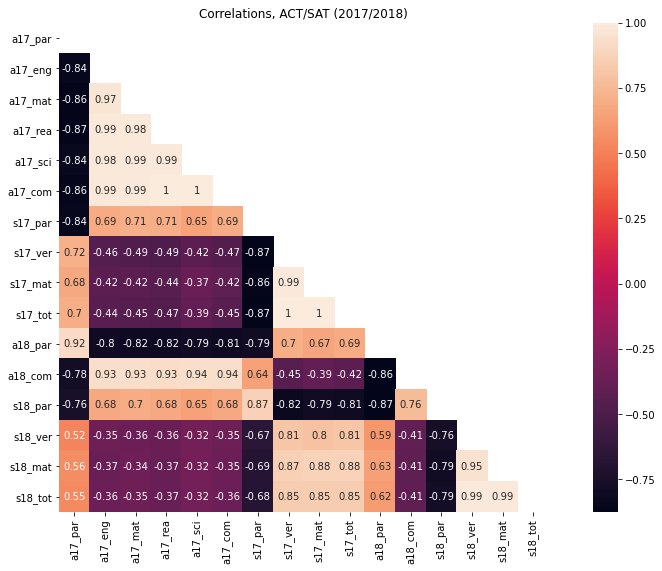

In [69]:
plt.figure(figsize=(16,9))
plt.title('Correlations, ACT/SAT (2017/2018)')
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(final.corr(), mask=mask, square=True, annot=True);

#Adapted from code in Matt Brems' 2.02-lesson-principles-of-data-visualization

In [70]:
simple = final.loc[:,['state', 'a17_par', 'a18_par', 's17_par', 's18_par', 'a17_com', 'a18_com', 's17_tot', 's18_tot']]


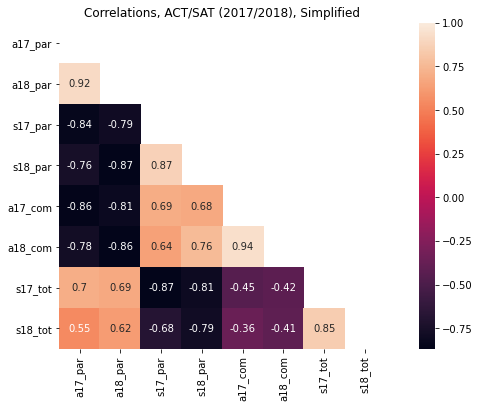

In [71]:
plt.figure(figsize=(12,6))
plt.title('Correlations, ACT/SAT (2017/2018), Simplified')
mask = np.zeros_like(simple.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(simple.corr(), mask=mask, square=True, annot=True);

###### <font color='green'>  Observations:

<font color='green'>Mildly surprising negative correlation (.36-.45) between states being good at SAT and ACT.  Might have assumed that high performance in one would correlate with high performance in the other.

Very strong negative correlation (.76-.87) between the participation in the two tests.  States either participate in the ACT or SAT at high rates, not both.

Positive correlation between participating in a test one year and then again the next year.  Unsurprising.  States tended to stick with the same test.

**Interesting** There is a strong (.78 - .86) negative correlation between participation rates and average final scores for either test.  The higher the participation rate, the worse the overall score.  Might imply that only the higher performing students took the less popular test in each state. </font> 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [72]:
# def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
#     nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
#     fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
#     ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#     for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#         ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

In [292]:
def subplot_histograms(dataframe, title, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10, 8)) 
    fig.suptitle(title, fontsize = 18)
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column]); 
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('# of States')
        plt.tight_layout(rect=[0, 0, 1, 0.95]);
        
#Code adapted using input from classmates Luke Podsiadlo, Alex Gordon, Zach Tretter, Jon Godin

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [74]:
final.columns

Index(['state', 'a17_par', 'a17_eng', 'a17_mat', 'a17_rea', 'a17_sci',
       'a17_com', 's17_par', 's17_ver', 's17_mat', 's17_tot', 'a18_par',
       'a18_com', 's18_par', 's18_ver', 's18_mat', 's18_tot'],
      dtype='object')

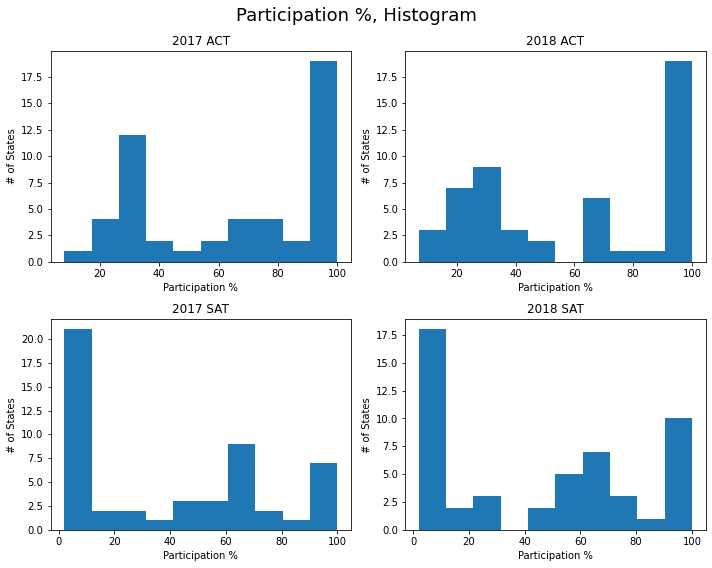

In [293]:
list1 = ['2017 ACT', '2018 ACT', '2017 SAT', '2018 SAT'] #Maybe?
list2 = ['Participation %', 'Participation %', 'Participation %', 'Participation %']

# Code ['state', 'a17_par', 'a18_par', 's17_par', 's18_par', 'a17_com', 'a18_com', 's17_tot', 's18_tot']
subplot_histograms(final, 'Participation %, Histogram', ['a17_par', 'a18_par', 's17_par', 's18_par'], list1, list2 );

<font color = 'green'> Participation rates are not normally distributed.  There is a cohort of high-participating states and one or two smaller humps representing lower participation states. </font>

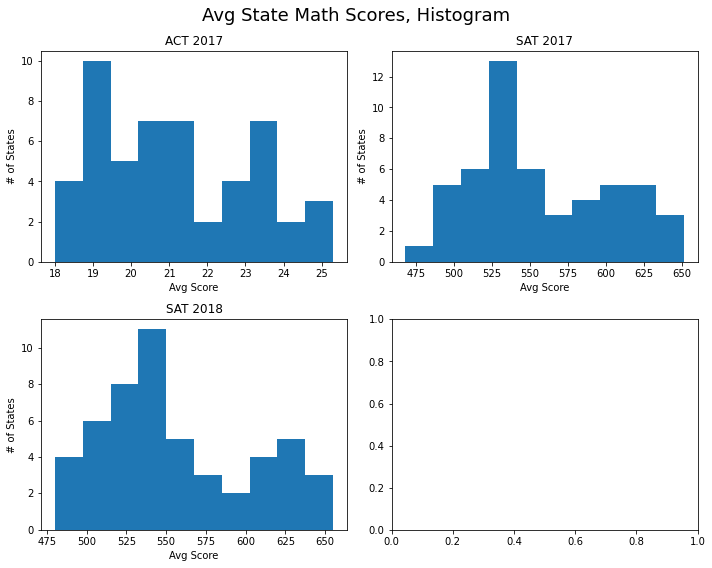

In [294]:
list1 = ['ACT 2017', 'SAT 2017', 'SAT 2018']
list2 = ['Avg Score', 'Avg Score', 'Avg Score']

subplot_histograms(final, 'Avg State Math Scores, Histogram', ['a17_mat', 's17_mat', 's18_mat'], list1, list2)

<font color = 'green'> Similar case here, one high performing cohort and another hump that's more middling </font>

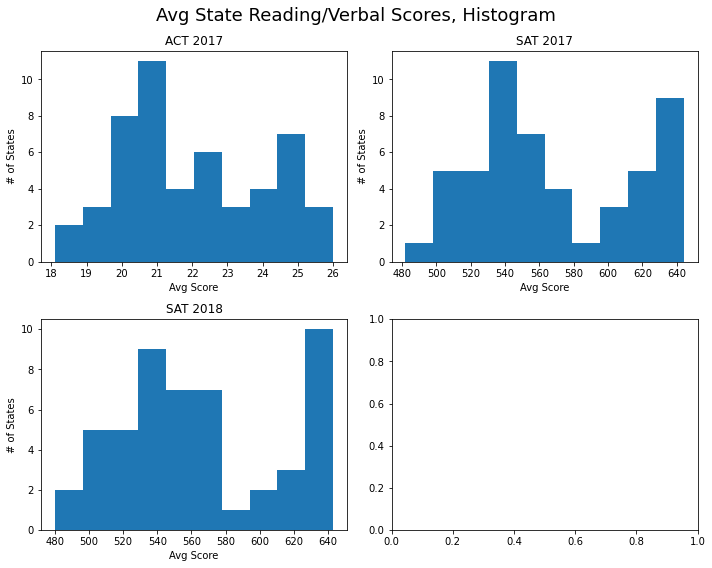

In [295]:
list1 = ['ACT 2017', 'SAT 2017', 'SAT 2018']
list2 = ['Avg Score', 'Avg Score', 'Avg Score']
subplot_histograms(final, 'Avg State Reading/Verbal Scores, Histogram', ['a17_rea', 's17_ver', 's18_ver'], list1, list2)

<font color = 'green'> Ditto, for this one </font>

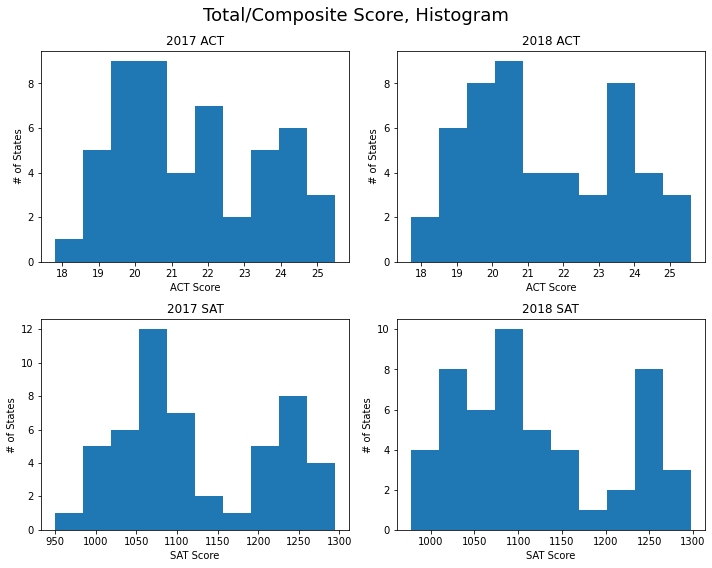

In [296]:
list1 = ['2017 ACT', '2018 ACT', '2017 SAT', '2018 SAT'] #Maybe?
list2 = ['ACT Score', 'ACT Score', 'SAT Score', 'SAT Score']

# Code ['state', 'a17_par', 'a18_par', 's17_par', 's18_par', 'a17_com', 'a18_com', 's17_tot', 's18_tot']
subplot_histograms(final, 'Total/Composite Score, Histogram', ['a17_com', 'a18_com', 's17_tot', 's18_tot'], list1, list2 );

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


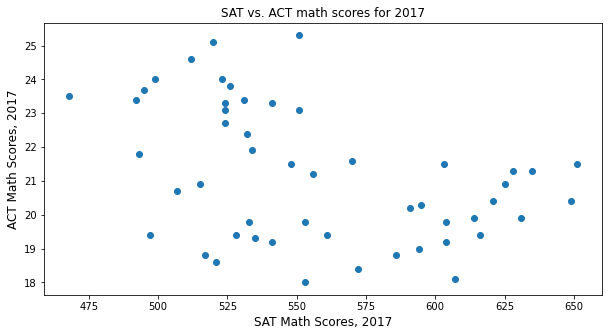

In [78]:
# Code
plt.figure(figsize=(10, 5))

plt.scatter(final['s17_mat'], final['a17_mat'])

plt.title("SAT vs. ACT math scores for 2017")
plt.ylabel("ACT Math Scores, 2017", fontsize = 12)
plt.xlabel("SAT Math Scores, 2017", fontsize = 12);

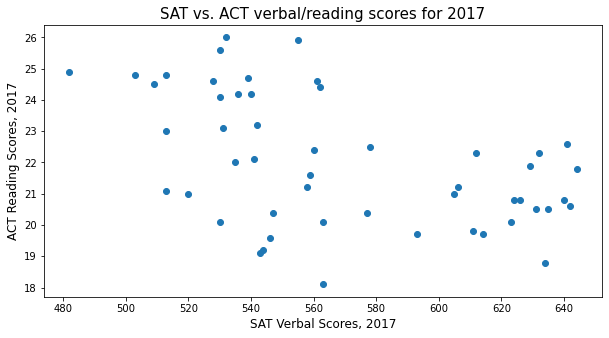

In [79]:

plt.figure(figsize=(10, 5))

plt.scatter(final['s17_ver'], final['a17_rea'])

plt.title("SAT vs. ACT verbal/reading scores for 2017", fontsize = 15)
plt.ylabel("ACT Reading Scores, 2017", fontsize = 12)
plt.xlabel("SAT Verbal Scores, 2017", fontsize = 12);

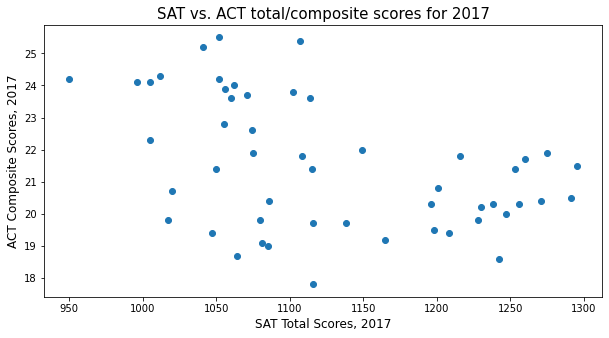

In [80]:

plt.figure(figsize=(10, 5))


plt.scatter(final['s17_tot'], final['a17_com'])

plt.title("SAT vs. ACT total/composite scores for 2017", fontsize = 15)
plt.ylabel("ACT Composite Scores, 2017", fontsize = 12)
plt.xlabel("SAT Total Scores, 2017", fontsize = 12);

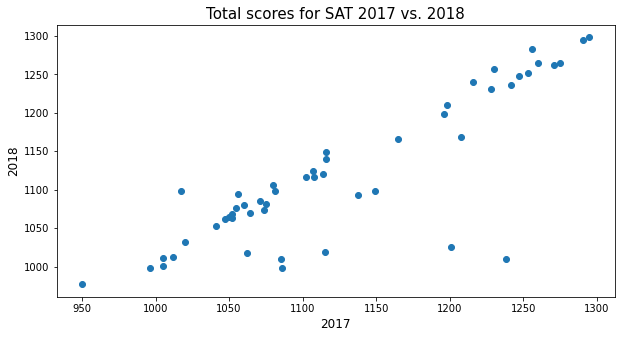

In [198]:

plt.figure(figsize=(10, 5))

plt.scatter(final['s17_tot'], final['s18_tot'])

plt.title("Total scores for SAT 2017 vs. 2018", fontsize = 15)

plt.xlabel("2017", fontsize = 12)
plt.ylabel("2018", fontsize = 12);

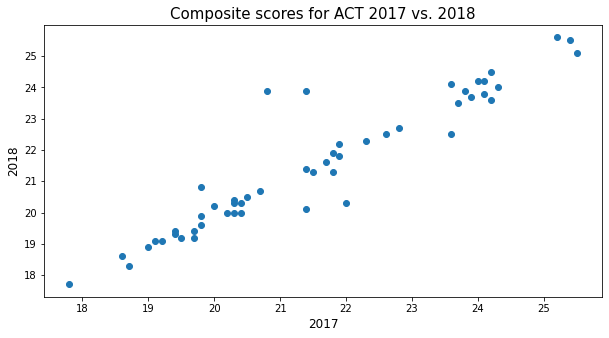

In [197]:

plt.figure(figsize=(10, 5))


plt.scatter(final['a17_com'], final['a18_com'])

plt.title("Composite scores for ACT 2017 vs. 2018", fontsize = 15)

plt.xlabel("2017", fontsize = 12)
plt.ylabel("2018", fontsize = 12);

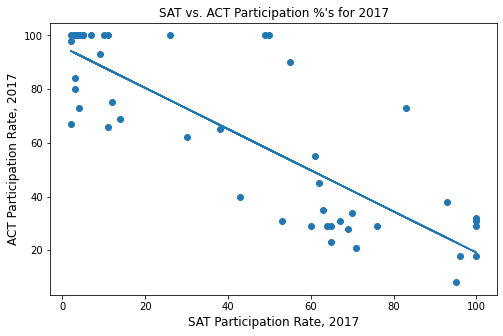

In [210]:
plt.figure(figsize=(8, 5))

plt.scatter(final['s17_par'], final['a17_par'])

plt.title("SAT vs. ACT Participation %'s for 2017")
plt.xlabel("SAT Participation Rate, 2017", fontsize = 12)
plt.ylabel("ACT Participation Rate, 2017", fontsize = 12);

z = np.polyfit(final['s17_par'], final['a17_par'], 1)
p = np.poly1d(z)
plt.plot(final['s17_par'],p(final['s17_par']),"--")
# formula for line of best fit adapted from user 'martinenzinger' post at
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [83]:
final.columns

Index(['state', 'a17_par', 'a17_eng', 'a17_mat', 'a17_rea', 'a17_sci',
       'a17_com', 's17_par', 's17_ver', 's17_mat', 's17_tot', 'a18_par',
       'a18_com', 's18_par', 's18_ver', 's18_mat', 's18_tot'],
      dtype='object')

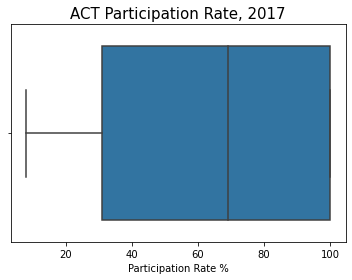

In [150]:
sns.boxplot(final['a17_par'])
plt.xlabel('Participation Rate %')
plt.title('ACT Participation Rate, 2017', fontsize = 15);

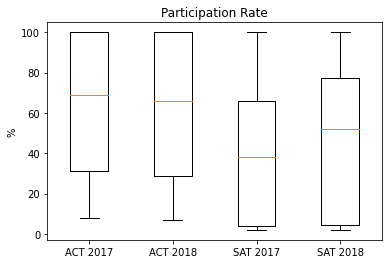

In [158]:
box_dict = {'ACT 2017': final['a17_par'], 'ACT 2018': final['a18_par'], 'SAT 2017': final['s17_par'], 'SAT 2018': final['s18_par']}

# plt.title('Participation Rate %')  # Neither of these attempts at title setting seem to work
fig, ax = plt.subplots()
ax.set_title('Participation Rate')
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())
ax.set_ylabel('%'); # The Y axis is my de facto title

# Adapted from code found shared by user Diziet Asahi at 
# https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary

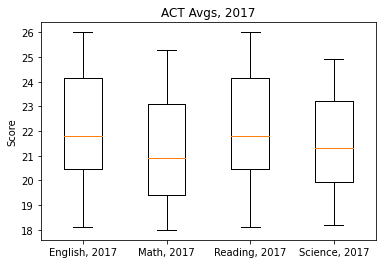

In [157]:
box_dict = {'English, 2017': final['a17_rea'], 
            'Math, 2017': final['a17_mat'], 
            'Reading, 2017': final['a17_rea'], 
            'Science, 2017': final['a17_sci']}
# 'a17_eng', 'a17_mat', 'a17_rea', 'a17_sci','a17_com'
# plt.title("ACT Score Averages, 2017")
fig, ax = plt.subplots()
ax.set_title('ACT Avgs, 2017')
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())
ax.set_ylabel('Score'); # The Y axis is my de facto title

# Adapted from code found shared by user Diziet Asahi at 
# https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary

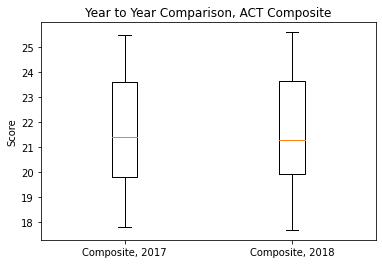

In [156]:
box_dict = {'Composite, 2017': final['a17_com'], 
            'Composite, 2018': final['a18_com'], 
            }
fig, ax = plt.subplots()
ax.set_title('Year to Year Comparison, ACT Composite')
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())
ax.set_ylabel('Score'); # The Y axis is my de facto title

# Adapted from code found shared by user Diziet Asahi at 
# https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary

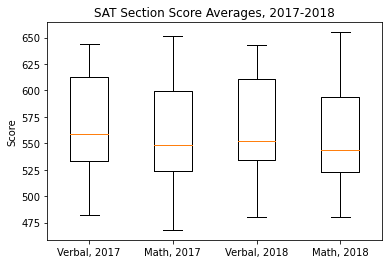

In [155]:
box_dict = {'Verbal, 2017': final['s17_ver'], 
            'Math, 2017': final['s17_mat'],  
            'Verbal, 2018': final['s18_ver'], 
            'Math, 2018': final['s18_mat'],}


fig, ax = plt.subplots()
ax.set_title("SAT Section Score Averages, 2017-2018")
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())
ax.set_ylabel('Score'); # The Y axis is my de facto title


# Adapted from code found shared by user Diziet Asahi at 
# https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary

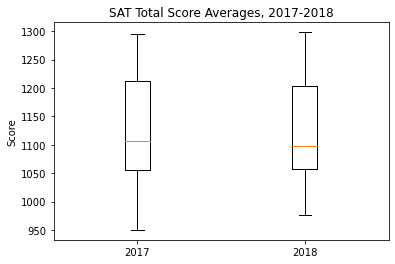

In [160]:
box_dict = { 
            '2017': final['s17_tot'], 
    
            '2018': final['s18_tot']}

fig, ax = plt.subplots()
ax.set_title("SAT Total Score Averages, 2017-2018")
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())
ax.set_ylabel('Score');


# Adapted from code found shared by user Diziet Asahi at 
# https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

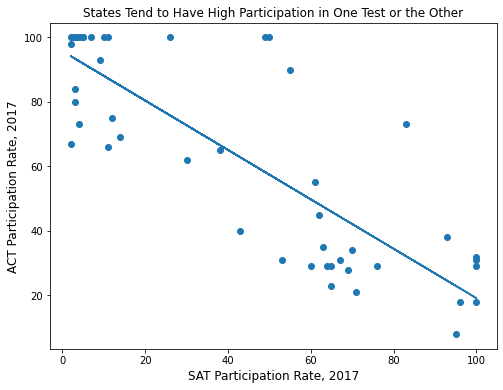

In [211]:
plt.figure(figsize=(8, 6))

plt.scatter(final['s17_par'], final['a17_par'])

plt.title("States Tend to Have High Participation in One Test or the Other")
plt.xlabel("SAT Participation Rate, 2017", fontsize = 12)
plt.ylabel("ACT Participation Rate, 2017", fontsize = 12)

z = np.polyfit(final['s17_par'], final['a17_par'], 1)
p = np.poly1d(z)
plt.plot(final['s17_par'],p(final['s17_par']),"--");

# code for line of best fit adapted from user 'martinenzinger' at
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs

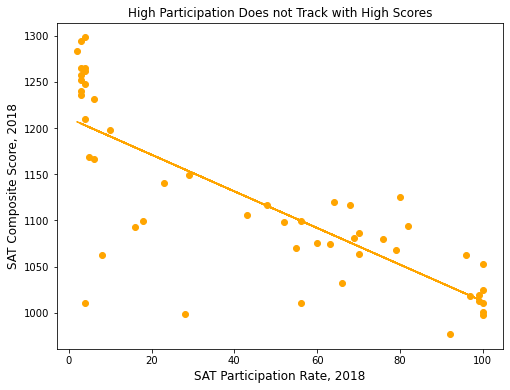

In [327]:
plt.figure(figsize=(8,6))

plt.scatter(final['s18_par'], final['s18_tot'], color = 'orange')

plt.title("High Participation Does not Track with High Scores")
plt.xlabel("SAT Participation Rate, 2018", fontsize = 12)
plt.ylabel("SAT Composite Score, 2018", fontsize = 12)

z = np.polyfit(final['s18_par'], final['s18_tot'], 1)
p = np.poly1d(z)
plt.plot(final['s18_par'],p(final['s18_par']),"--", color = "orange");

# code for line of best fit adapted from user 'martinenzinger' at
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


In [179]:
a = look_up('Illinois')['a17_par']

In [232]:
a 

13    93.0
Name: a17_par, dtype: float64

In [ ]:
look_up()

In [247]:
int(look_up('Massachusetts').iloc[:,2])

76

In [259]:
int(look_up(state)['a17_par'])

100

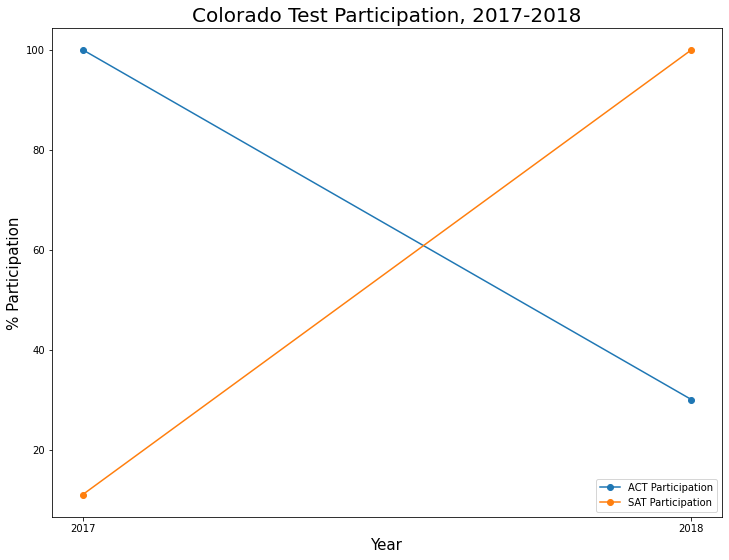

In [278]:

plt.figure(figsize=(12, 9))


plt.plot((2017, 2018),
         (int(look_up('Colorado')['a17_par']), int(look_up('Colorado')['a18_par'])),
        marker = 'o', label = "ACT Participation")

plt.plot((2017, 2018),
         (int(look_up('Colorado')['s17_par']), int(look_up('Colorado')['s18_par'])),
        marker = 'o', label = "SAT Participation")

plt.title('Colorado Test Participation, 2017-2018', fontsize = 20)    
plt.legend(loc = 'best')
plt.xticks(ticks = [2017, 2018])
plt.ylabel("% Participation", fontsize = 15)
plt.xlabel("Year", fontsize = 15);

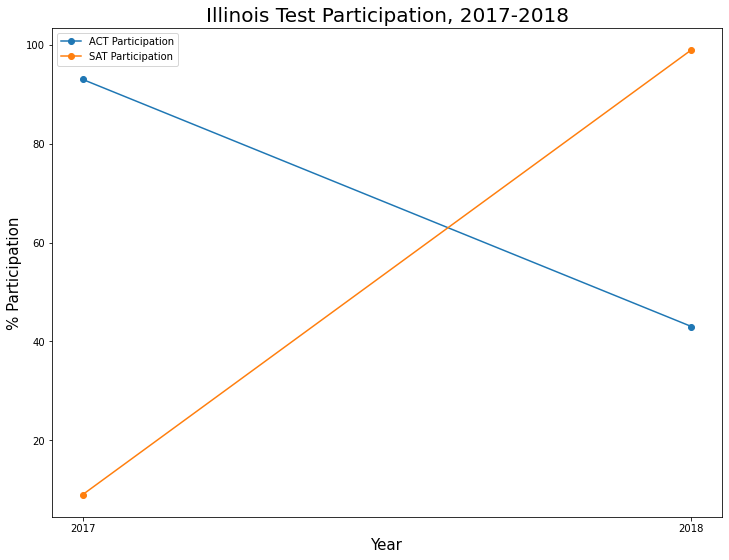

In [279]:
plt.figure(figsize=(12, 9))


plt.plot((2017, 2018),
         (int(look_up('Illinois')['a17_par']), int(look_up('Illinois')['a18_par'])),
        marker = 'o', label = "ACT Participation")

plt.plot((2017, 2018),
         (int(look_up('Illinois')['s17_par']), int(look_up('Illinois')['s18_par'])),
        marker = 'o', label = "SAT Participation")

plt.title('Illinois Test Participation, 2017-2018', fontsize = 20)    
plt.legend(loc = 'best')
plt.xticks(ticks = [2017, 2018])
plt.ylabel("% Participation", fontsize = 15)
plt.xlabel("Year", fontsize = 15);

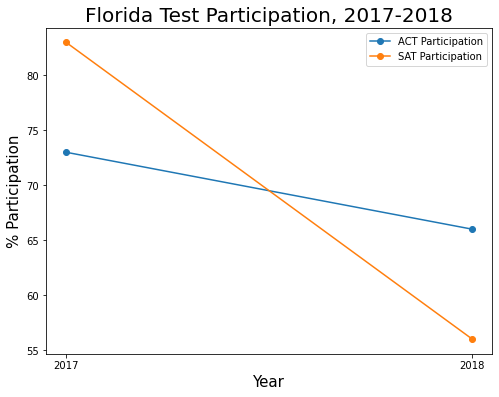

In [317]:
plt.figure(figsize=(8, 6))


plt.plot((2017, 2018),
         (int(look_up('Florida')['a17_par']), int(look_up('Florida')['a18_par'])),
        marker = 'o', label = "ACT Participation")

plt.plot((2017, 2018),
         (int(look_up('Florida')['s17_par']), int(look_up('Florida')['s18_par'])),
        marker = 'o', label = "SAT Participation")

plt.title('Florida Test Participation, 2017-2018', fontsize = 20)    
plt.legend(loc = 'best')
plt.xticks(ticks = [2017, 2018])
plt.ylabel("% Participation", fontsize = 15)
plt.xlabel("Year", fontsize = 15);

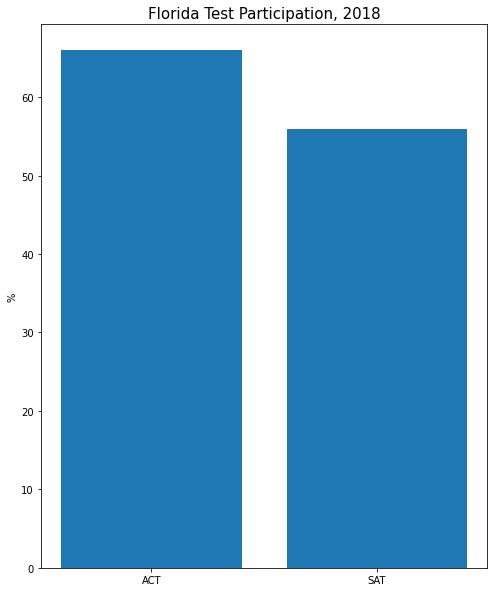

In [321]:
plt.figure(figsize=(8, 10))


# Create a bar chart.
# plt.bar() will create a vertical bar chart.
plt.bar(['ACT', 'SAT'],  #X labels/location
       [int(look_up('Florida')['a18_par']), int(look_up('Florida')['s18_par'])]) # Y height of bars

# Add a title and show the plot.
plt.title('Florida Test Participation, 2018', fontsize = 15)

plt.ylabel('%');

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

<font color = 'green'> Illinois, Colorado, Florida </font>

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

 
<font color = 'green'>    The basic trends are inertia, bimodality, sampling bias, and zero sum status.
    
<font color = 'green'>     States tended to stay with one test, and perform similarly year to year.  Big changes in participation were rare and due to discrete and identifiable interventions at the state level.
    
<font color = 'green'>     Participation rates tended toward two distinct clusters: a set of high participation states that either mandated a particular test or proctored it at state expense, and another set of states that participated at middling rates voluntarily or as a supplement to the other test.
    
<font color = 'green'>     As participation increases, score returns decrease.  This is likely due to the supplementary status of the less-taken test selecting for motivated students who are confident that they test well enough that taking the second test will help their college chances.  Mandatory testing includes students who do not plan to continue their education after high school and will be less motivated to prepare.
    
<font color = 'green'>     States do not mandate both tests.  At most, they will mandate one or the other, and it is likely that even if they are not mandatory, the familiarity of being more common in an area will lead to that being the 'default choice' for students who do wish to take a test, but not necessarily both.  There 'gravity' effect that pulls participation rates toward low or high extremes as a test gets more or less common.
    
<font color = 'green'>     Colorado and Illinois were flipped by the SAT winning state contracts to become the state's mandatory test, proctored at state expense.  One cited reason for this was that the SAT revamped the test in 2016 to be more in line with Common Core standards, making the SAT freshly relevant as a valid assessment tool for school systems rather than a general test of student aptitude.  State contracts are the biggest targets, and by considering state needs such as assessment, the design and marketing of the SAT can be made more appealing.
    
<font color = 'green'>     The other approach is to look at states that have no true center of gravity, ACT or SAT, yet, and might be considered up for grabs.  A state like Florida that is considering instituting mandatory testing, but not yet one in particular, could be won 'piece by piece' until it makes sense just to make that the official test (it should be noted that the same bodies open to mandatory testing in Florida also voice some displeasure with the Common Core, so a different marketing approach would be warranted in these areas).  The SAT lost market share to the ACT between 2017 and 2018, and while Florida may continue to buck the 'one or the other' trend, it seems likely that over time, if participation rates are not increased, they will decrease in favor of the competition. </font>

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [90]:
# Code: